## <center>Regulation, government quality, and green handicraft growth</center>
### <center>Data analysis : descriptive statistics</center>

#### DIW Berlin, Caroline Stiel

last modified: October 29, 2024 (cs)

-----------------------------------------

#### 1. Import libraries, define paths

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pathlib
import seaborn as sns

In [2]:
MAIN = pathlib.Path().resolve()
ORIG = MAIN / "origdata" # original data
DATA = MAIN / "data" # working data
RESULTS = MAIN / "results" # figures etc.

#### 2. Load green handicraft *(Klimahandwerk)* data set

In [49]:
# data set 2008 till 2022
# -----------------------
dataGHC = pd.read_csv(DATA/"dataGHC.csv",delimiter=';', encoding='latin-1')
dataGHC = pd.DataFrame(dataGHC)

# consider only years after 2012
# -------------------------------
# reason: data for 6 professions only avail after 2012
dataGHC = dataGHC[dataGHC["year"]>2012]

# browse through data frame
# -------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(dataGHC)

year  bl                 bl_name        wz  \
2080  2013   8       Baden-Württemberg  HWO-A-01   
2081  2013   8       Baden-Württemberg  HWO-A-03   
2082  2013   8       Baden-Württemberg  HWO-A-04   
2083  2013   8       Baden-Württemberg  HWO-A-05   
2084  2013   8       Baden-Württemberg  HWO-A-06   
2085  2013   8       Baden-Württemberg  HWO-A-07   
2086  2013   8       Baden-Württemberg  HWO-A-43   
2087  2013   8       Baden-Württemberg  HWO-A-09   
2088  2013   8       Baden-Württemberg  HWO-A-10   
2089  2013   8       Baden-Württemberg  HWO-A-23   
2090  2013   8       Baden-Württemberg  HWO-A-24   
2091  2013   8       Baden-Württemberg  HWO-A-25   
2092  2013   8       Baden-Württemberg  HWO-A-27   
2093  2013   8       Baden-Württemberg  HWO-A-39   
2094  2013   8       Baden-Württemberg  HWO-A-42   
2095  2013   8       Baden-Württemberg  HWO-A-44   
2096  2013   8       Baden-Württemberg  HWO-A-47   
2097  2013   8       Baden-Württemberg  HWO-A-52   
2098  2013   8       Baden-Württemberg  HWO-A-13   
2099  2013   8       Baden-Württemberg  HWO-A-18   
2100  2013   8       Baden-Württemberg  HWO-A-21   
2101  2013   8       Baden-Württemberg  HWO-A-26   
2102  2013   8       Baden-Württemberg  HWO-A-45   
2103  2013   8       Baden-Württemberg  HWO-A-17   
2104  2013   8       Baden-Württemberg  HWO-A-20   
2105  2013   8       Baden-Württemberg  HWO-A-12   
2106  2013   9                  Bayern  HWO-A-01   
2107  2013   9                  Bayern  HWO-A-03   
2108  2013   9                  Bayern  HWO-A-04   
2109  2013   9                  Bayern  HWO-A-05   
2110  2013   9                  Bayern  HWO-A-06   
2111  2013   9                  Bayern  HWO-A-07   
2112  2013   9                  Bayern  HWO-A-43   
2113  2013   9                  Bayern  HWO-A-09   
2114  2013   9                  Bayern  HWO-A-10   
2115  2013   9                  Bayern  HWO-A-23   
2116  2013   9                  Bayern  HWO-A-24   
2117  2013   9                  Bayern  HWO-A-25   
2118  2013   9                  Bayern  HWO-A-27   
2119  2013   9                  Bayern  HWO-A-39   
2120  2013   9                  Bayern  HWO-A-42   
2121  2013   9                  Bayern  HWO-A-44   
2122  2013   9                  Bayern  HWO-A-47   
2123  2013   9                  Bayern  HWO-A-52   
2124  2013   9                  Bayern  HWO-A-13   
2125  2013   9                  Bayern  HWO-A-18   
2126  2013   9                  Bayern  HWO-A-21   
2127  2013   9                  Bayern  HWO-A-26   
2128  2013   9                  Bayern  HWO-A-45   
2129  2013   9                  Bayern  HWO-A-17   
2130  2013   9                  Bayern  HWO-A-20   
2131  2013   9                  Bayern  HWO-A-12   
2132  2013  11                  Berlin  HWO-A-01   
2133  2013  11                  Berlin  HWO-A-03   
2134  2013  11                  Berlin  HWO-A-04   
2135  2013  11                  Berlin  HWO-A-05   
2136  2013  11                  Berlin  HWO-A-06   
2137  2013  11                  Berlin  HWO-A-07   
2138  2013  11                  Berlin  HWO-A-43   
2139  2013  11                  Berlin  HWO-A-09   
2140  2013  11                  Berlin  HWO-A-10   
2141  2013  11                  Berlin  HWO-A-23   
2142  2013  11                  Berlin  HWO-A-24   
2143  2013  11                  Berlin  HWO-A-25   
2144  2013  11                  Berlin  HWO-A-27   
2145  2013  11                  Berlin  HWO-A-39   
2146  2013  11                  Berlin  HWO-A-42   
2147  2013  11                  Berlin  HWO-A-44   
2148  2013  11                  Berlin  HWO-A-47   
2149  2013  11                  Berlin  HWO-A-52   
2150  2013  11                  Berlin  HWO-A-13   
2151  2013  11                  Berlin  HWO-A-18   
2152  2013  11                  Berlin  HWO-A-21   
2153  2013  11                  Berlin  HWO-A-26   
2154  2013  11                  Berlin  HWO-A-45   
2155  2013  11                  Berlin  HWO-A-17   
21

#### 3. Aggregation

In [50]:
# aggregation by year
# -------------------
groupedY = dataGHC.groupby(['year'])[['turnover','employees_sum']].sum().reset_index()

# aggregation by year and profession
# ----------------------------------
groupedNY = dataGHC.groupby(['name','year'])[['turnover','employees_sum']].sum().reset_index()

# browse through agregated data set
# ---------------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(groupedNY)
    
# no data in selected professions before 2012. Therefor, start data set in 2013.

name  year     turnover  \
0                 Behälter- und Apparatebauer  2013     634801.0   
1                 Behälter- und Apparatebauer  2014     645434.0   
2                 Behälter- und Apparatebauer  2015     733243.0   
3                 Behälter- und Apparatebauer  2016     765232.0   
4                 Behälter- und Apparatebauer  2017     730446.0   
5                 Behälter- und Apparatebauer  2018     822237.0   
6                 Behälter- und Apparatebauer  2019     841062.0   
7                 Behälter- und Apparatebauer  2020     833059.0   
8                 Behälter- und Apparatebauer  2021     912771.0   
9                 Behälter- und Apparatebauer  2022    1005172.0   
10                               Brunnenbauer  2013     609143.0   
11                               Brunnenbauer  2014     582248.0   
12                               Brunnenbauer  2015     584479.0   
13                               Brunnenbauer  2016     609537.0   
14                               Brunnenbauer  2017     671264.0   
15                               Brunnenbauer  2018     733447.0   
16                               Brunnenbauer  2019     797111.0   
17                               Brunnenbauer  2020     899112.0   
18                               Brunnenbauer  2021     931517.0   
19                               Brunnenbauer  2022    1124089.0   
20                                 Dachdecker  2013    9009010.0   
21                                 Dachdecker  2014    9321999.0   
22                                 Dachdecker  2015    9183480.0   
23                                 Dachdecker  2016    9187857.0   
24                                 Dachdecker  2017    9487338.0   
25                                 Dachdecker  2018   10421483.0   
26                                 Dachdecker  2019   10552874.0   
27                                 Dachdecker  2020   11491855.0   
28                                 Dachdecker  2021   11368233.0   
29                                 Dachdecker  2022   12945411.0   
30                      Elektromaschinenbauer  2013    1886839.0   
31                      Elektromaschinenbauer  2014    1989801.0   
32                      Elektromaschinenbauer  2015    1960607.0   
33                      Elektromaschinenbauer  2016    1969658.0   
34                      Elektromaschinenbauer  2017    2141331.0   
35                      Elektromaschinenbauer  2018    2235674.0   
36                      Elektromaschinenbauer  2019    2197395.0   
37                      Elektromaschinenbauer  2020    2074000.0   
38                      Elektromaschinenbauer  2021    2223928.0   
39                      Elektromaschinenbauer  2022    2526375.0   
40                           Elektrotechniker  2013   45169775.0   
41                           Elektrotechniker  2014   46361503.0   
42                           Elektrotechniker  2015   46867182.0   
43                           Elektrotechniker  2016   48295972.0   
44                           Elektrotechniker  2017   51328227.0   
45                           Elektrotechniker  2018   54514252.0   
46                           Elektrotechniker  2019   58106771.0   
47                           Elektrotechniker  2020   61408126.0   
48                           Elektrotechniker  2021   63293736.0   
49                           Elektrotechniker  2022   69861627.0   
50                               Estrichleger  2013    1572680.0   
51                               Estrichleger  2014    1726785.0   
52                               Estrichleger  2015    1707460.0   
53                               Estrichleger  2016    1796478.0   
54                               Estrichleger  2017    1948081.0   
55                               Estrichleger  2018    2186756.0   
56                               Estrichleger  2019    2315768.0   
57                               Estrichleger  2020    2417106.0   
58                           

In [58]:
# aggregation by year and federal state
# -------------------------------------
groupedFY = dataGHC.groupby(['bl_name','year'])[['turnover','employees_sum']].sum().reset_index()

# rescale turnover to billion EUR
# --------------------------------
groupedFY['turnover'] = groupedFY['turnover']/1000000

# browse through agregated data set
# ---------------------------------
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(groupedFY)

bl_name  year    turnover  employees_sum
0         Baden-Württemberg  2013   57.433515       396784.0
1         Baden-Württemberg  2014   58.697175       404900.0
2         Baden-Württemberg  2015   62.272110       410483.0
3         Baden-Württemberg  2016   64.846172       411948.0
4         Baden-Württemberg  2017   66.908466       420459.0
5         Baden-Württemberg  2018   72.580223       439843.0
6         Baden-Württemberg  2019   76.562456       443049.0
7         Baden-Württemberg  2020   79.435182       446176.0
8         Baden-Württemberg  2021   77.541313       445839.0
9         Baden-Württemberg  2022   82.090194       441553.0
10                   Bayern  2013   70.627045       498853.0
11                   Bayern  2014   73.254968       519332.0
12                   Bayern  2015   75.251733       516486.0
13                   Bayern  2016   78.771300       524895.0
14                   Bayern  2017   83.700139       536231.0
15                   Bayern  2018   89.072530       549043.0
16                   Bayern  2019   93.514591       560516.0
17                   Bayern  2020   98.915081       566033.0
18                   Bayern  2021  100.102016       568997.0
19                   Bayern  2022  110.005447       569939.0
20                   Berlin  2013    8.118210        75222.0
21                   Berlin  2014    8.476734        76267.0
22                   Berlin  2015    9.027903        77507.0
23                   Berlin  2016    9.480341        77604.0
24                   Berlin  2017   10.185920        79969.0
25                   Berlin  2018   11.273984        85061.0
26                   Berlin  2019   11.987551        87316.0
27                   Berlin  2020   12.273040        86635.0
28                   Berlin  2021   12.122197        86431.0
29                   Berlin  2022   13.231041        85083.0
30              Brandenburg  2013   10.134307        99633.0
31              Brandenburg  2014   10.240789        99445.0
32              Brandenburg  2015   10.557268        99873.0
33              Brandenburg  2016   10.717572        98737.0
34              Brandenburg  2017   11.074784        98849.0
35              Brandenburg  2018   11.890197       101574.0
36              Brandenburg  2019   12.469198       103030.0
37              Brandenburg  2020   13.087736       101381.0
38              Brandenburg  2021   13.009985       101388.0
39              Brandenburg  2022   13.858252        99829.0
40                   Bremen  2013    2.021166        15601.0
41                   Bremen  2014    2.204224        16465.0
42                   Bremen  2015    2.179330        16513.0
43                   Bremen  2016    2.227828        16585.0
44                   Bremen  2017    2.417690        17122.0
45                   Bremen  2018    2.546972        17963.0
46                   Bremen  2019    2.256589        17110.0
47                   Bremen  2020    2.325081        17832.0
48                   Bremen  2021    2.401165        17526.0
49                   Bremen  2022    2.521901        17071.0
50                  Hamburg  2013    6.555513        43237.0
51                  Hamburg  2014    6.568136        42806.0
52                  Hamburg  2015    6.921490        43213.0
53                  Hamburg  2016    6.972669        42867.0
54                  Hamburg  2017    7.217103        44127.0
55                  Hamburg  2018    7.629119        45586.0
56                  Hamburg  2019    8.057077        46472.0
57                  Hamburg  2020    7.735960        46016.0
58                  Hamburg  2021    7.693412        44461.0
59                  Hamburg  2022    8.689700        46768.0
60                   Hessen  2013   22.522085       180205.0
61                   Hessen  2014   23.215609       184898.0
62                   Hessen  2015   23.891692       186339.0
63                   Hessen  2016   25.354488       189240.0
64                   Hessen  2017   26.285388       191

#### 4. Summary statistics (Figures)

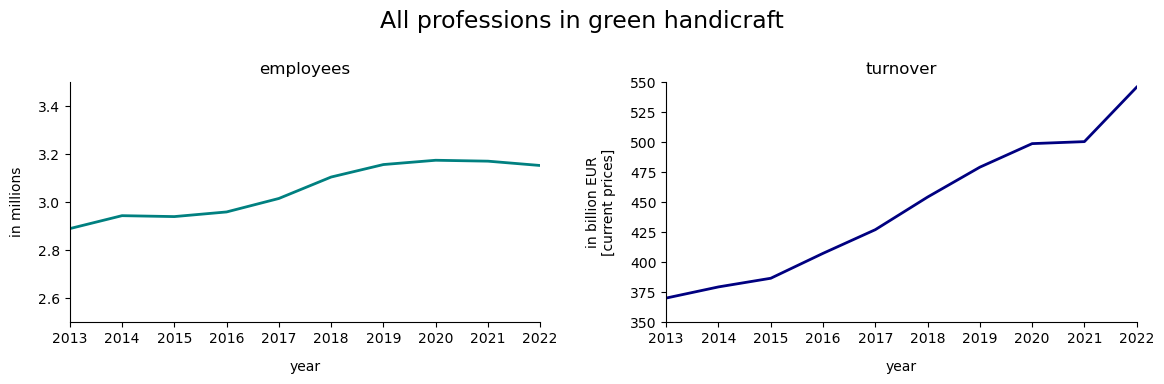

In [67]:
# Total employees and turnover in green handicraft by year
# --------------------------------------------------------
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12, 4))

# employees
ax1.plot(groupedY["year"],groupedY["employees_sum"]/1000000,color="teal",linewidth=2)
ax1.ticklabel_format(useOffset=False,style='plain')
ax1.set(title = "employees",xlim=(2013,2022),ylim=(2.5,3.5))
ax1.set_ylabel("in millions", labelpad=10)
ax1.set_xlabel("year", labelpad=10)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# turnover
ax2.plot(groupedY["year"],groupedY["turnover"]/1000000,color="navy",linewidth=2)
ax2.ticklabel_format(useOffset=False,style='plain')
ax2.set(title = "turnover",xlim=(2013,2022),ylim=(350,550))
ax2.set_ylabel("in billion EUR\n[current prices]", labelpad=10)
ax2.set_xlabel("year", labelpad=10)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

# space between subplots
fig.tight_layout(pad=2.0)
fig.suptitle("All professions in green handicraft",fontsize=17)
fig.subplots_adjust(top=.8)
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


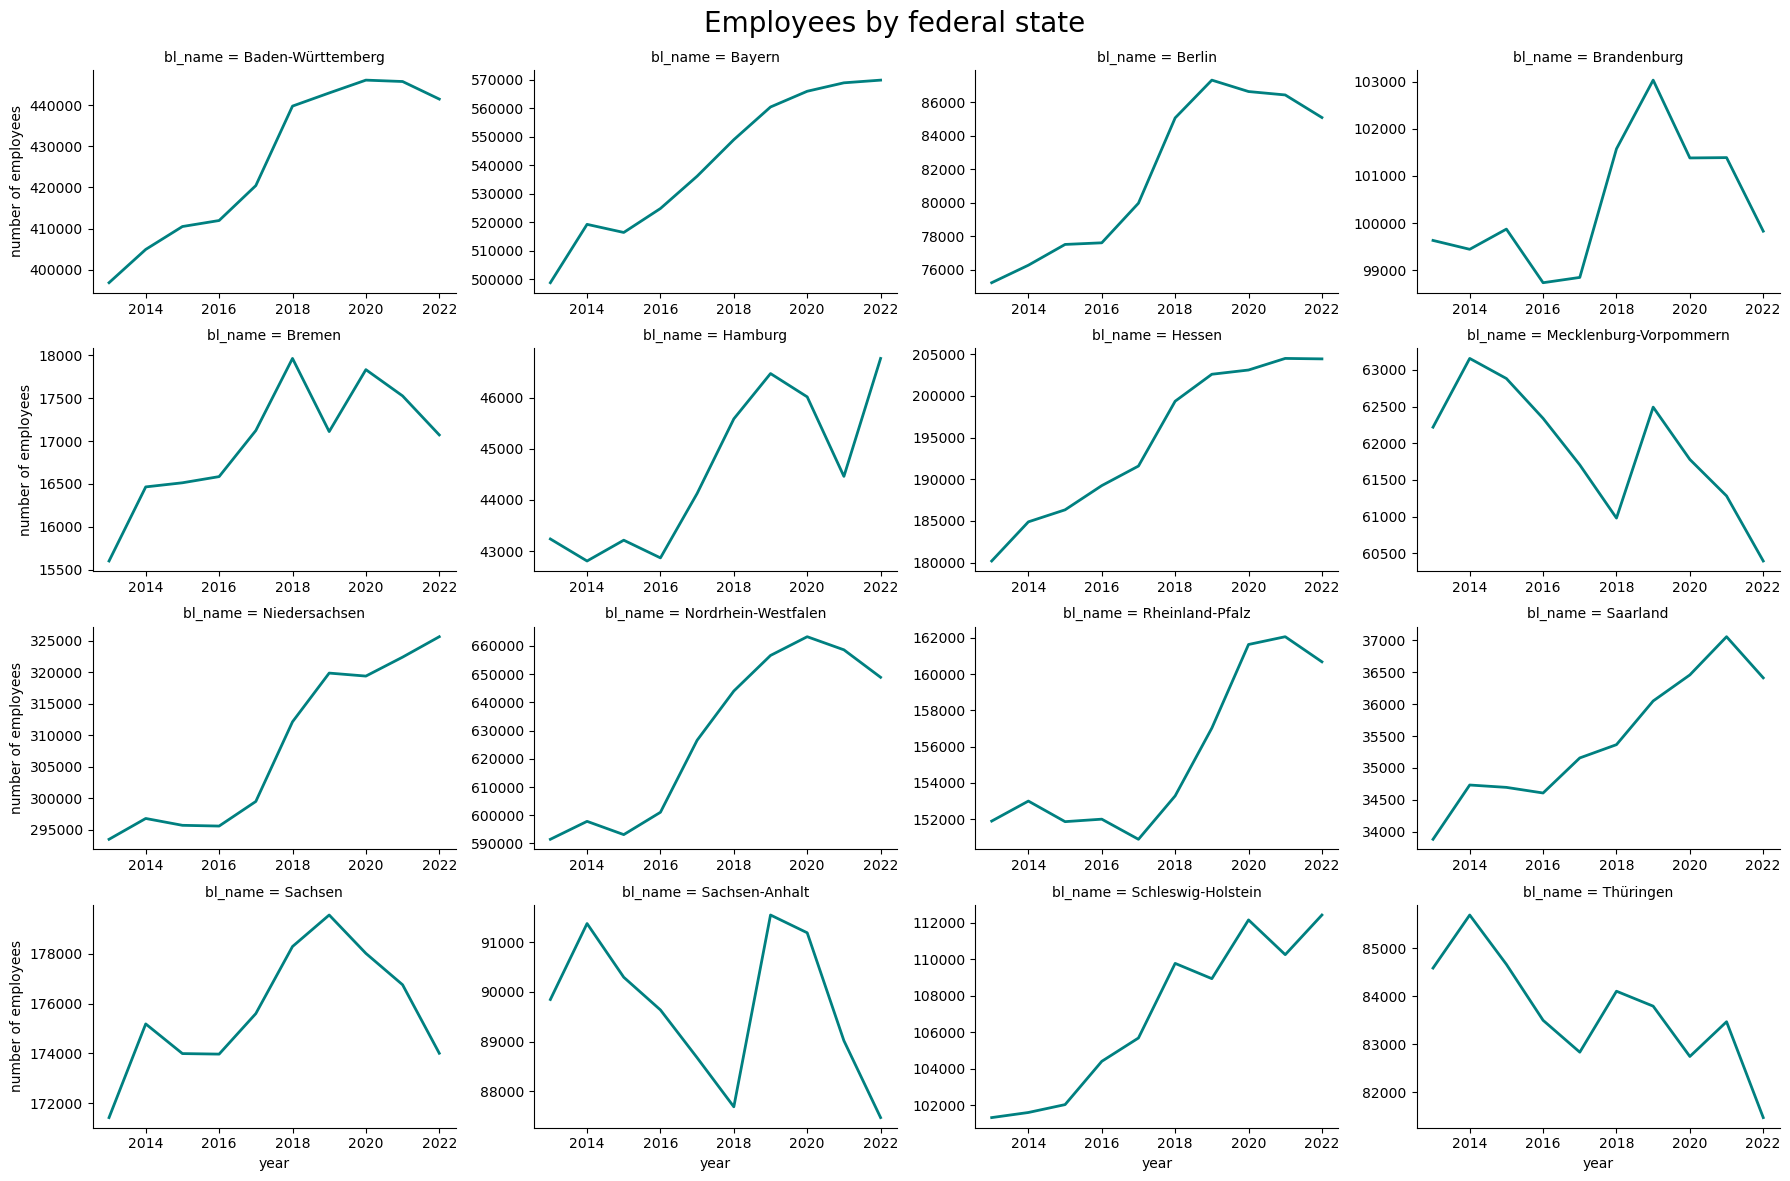

In [88]:
# Total employees by year and federal state
# -----------------------------------------

# using sns.FacetGrid
# --------------------
figFY1 = sns.FacetGrid(groupedFY, col='bl_name', sharex=False, sharey=False, col_wrap=4, height=3, aspect=1.5)
figFY1.map_dataframe(sns.lineplot, x='year', y='employees_sum',color="teal",linewidth=2)
for ax in figFY1.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')
figFY1.set_axis_labels(y_var="number of employees")
figFY1.fig.suptitle('Employees by federal state',fontsize=20)
figFY1.fig.subplots_adjust(top=.93) # adjust the space between title and figure

# using sns.relplot
# -----------------
# disadvantage: subplots share axes which hides variation in states with lower turnover
#graph = sns.relplot(data=groupedFY,x='year', y='employees',col='bl_name', col_wrap=3, height=3, aspect=1.5,kind='line')
#for ax in graph.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


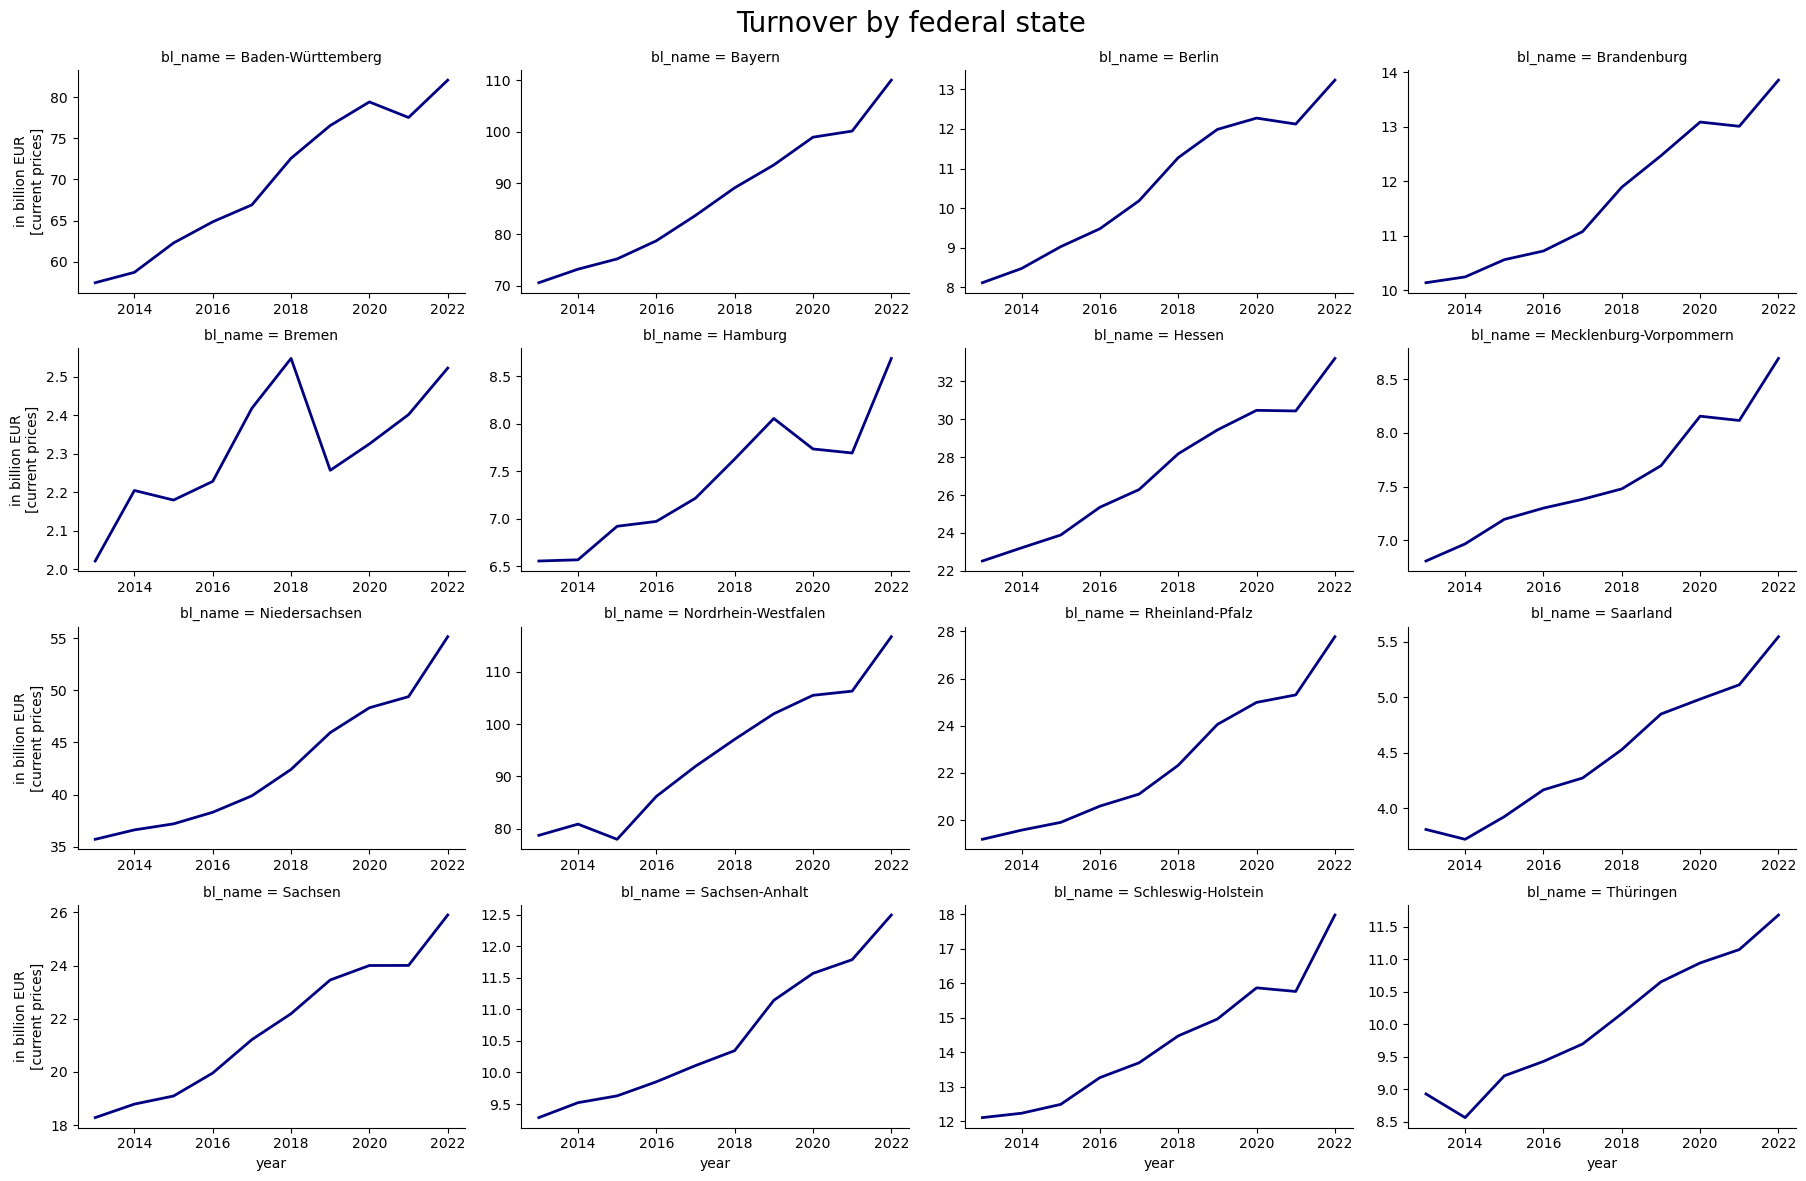

In [87]:
# Total turnover by year and federal state
# ----------------------------------------
figFY2 = sns.FacetGrid(groupedFY, col='bl_name', sharex=False, sharey=False, col_wrap=4, height=3, aspect=1.5)
figFY2.map_dataframe(sns.lineplot, x='year', y='turnover',color="navy",linewidth=2)
for ax in figFY2.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')
figFY2.set_axis_labels(y_var="in billion EUR\n[current prices]")
figFY2.fig.suptitle('Turnover by federal state',fontsize=20)
figFY2.fig.subplots_adjust(top=.93) # adjust the space between title and figure


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


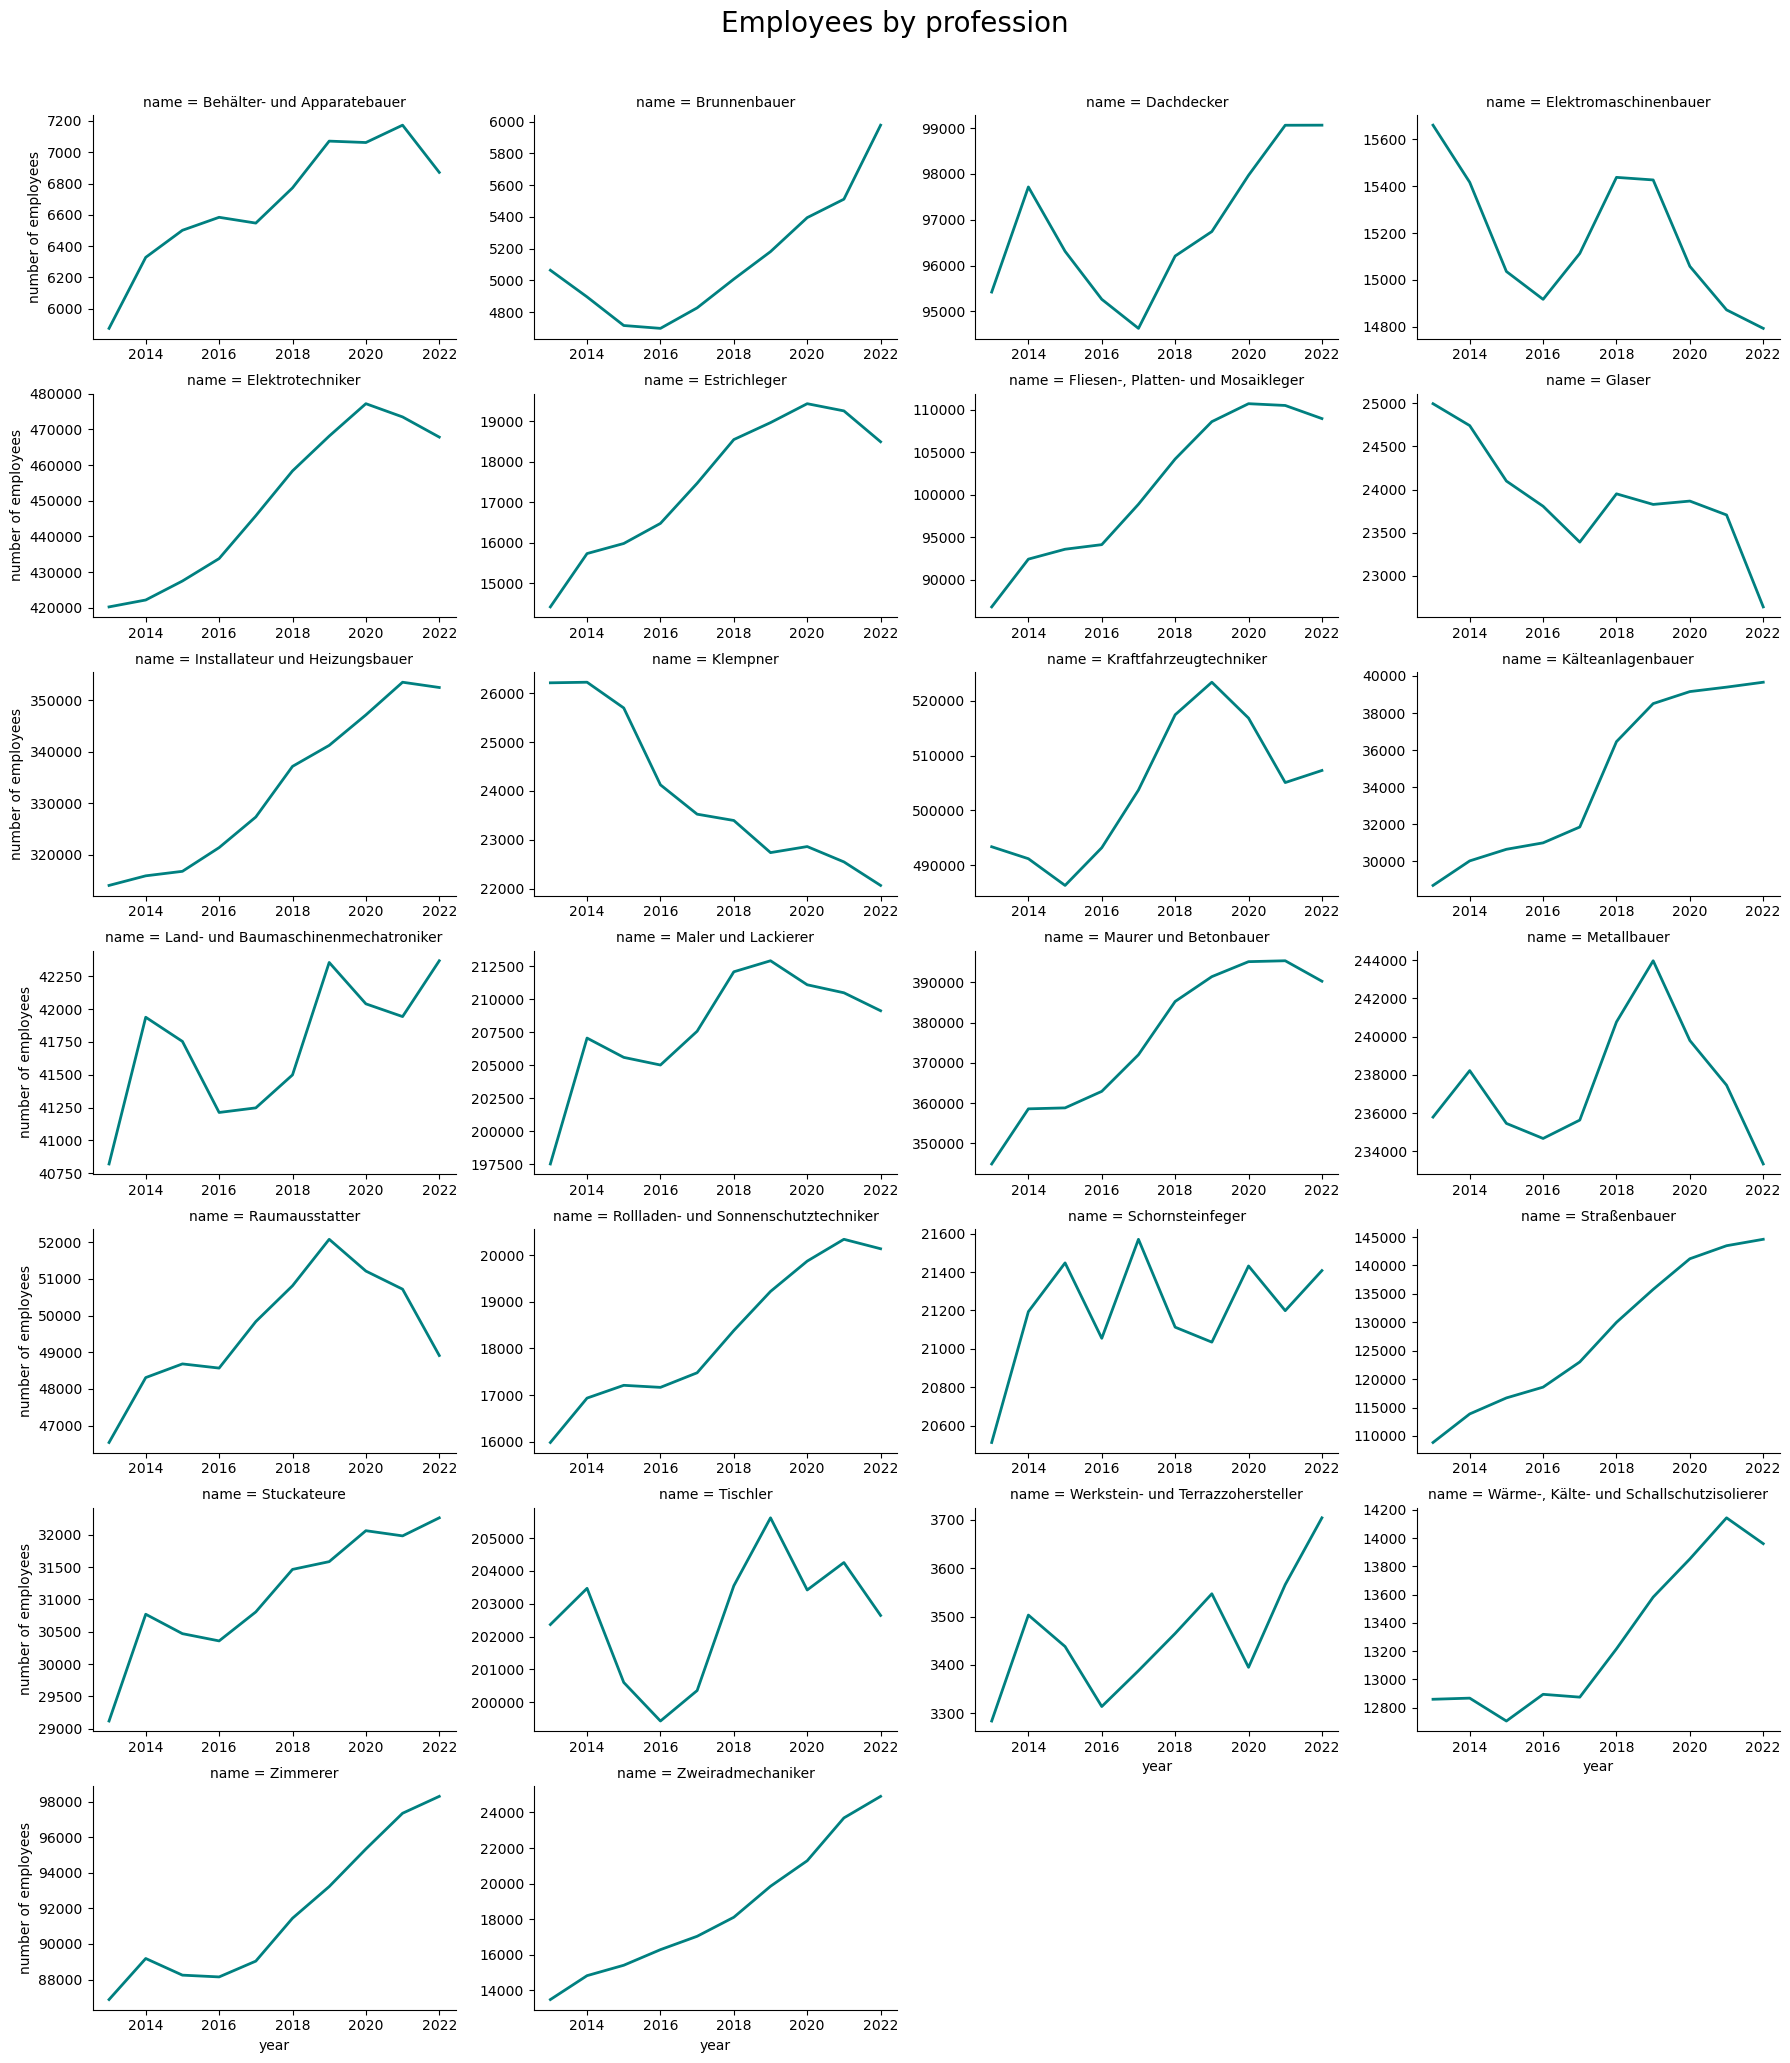

In [89]:
# Total employees by year and profession
# -------------------------------------
figNY1 = sns.FacetGrid(groupedNY, col='name', sharex=False, sharey=False, col_wrap=4, height=3, aspect=1.5)
figNY1.map_dataframe(sns.lineplot, x='year', y='employees_sum',color="teal",linewidth=2)
for ax in figNY1.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')
figNY1.set_axis_labels(y_var="number of employees")
figNY1.fig.suptitle('Employees by profession',fontsize=20)
figNY1.fig.subplots_adjust(top=.93) # adjust the space between title and figure


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


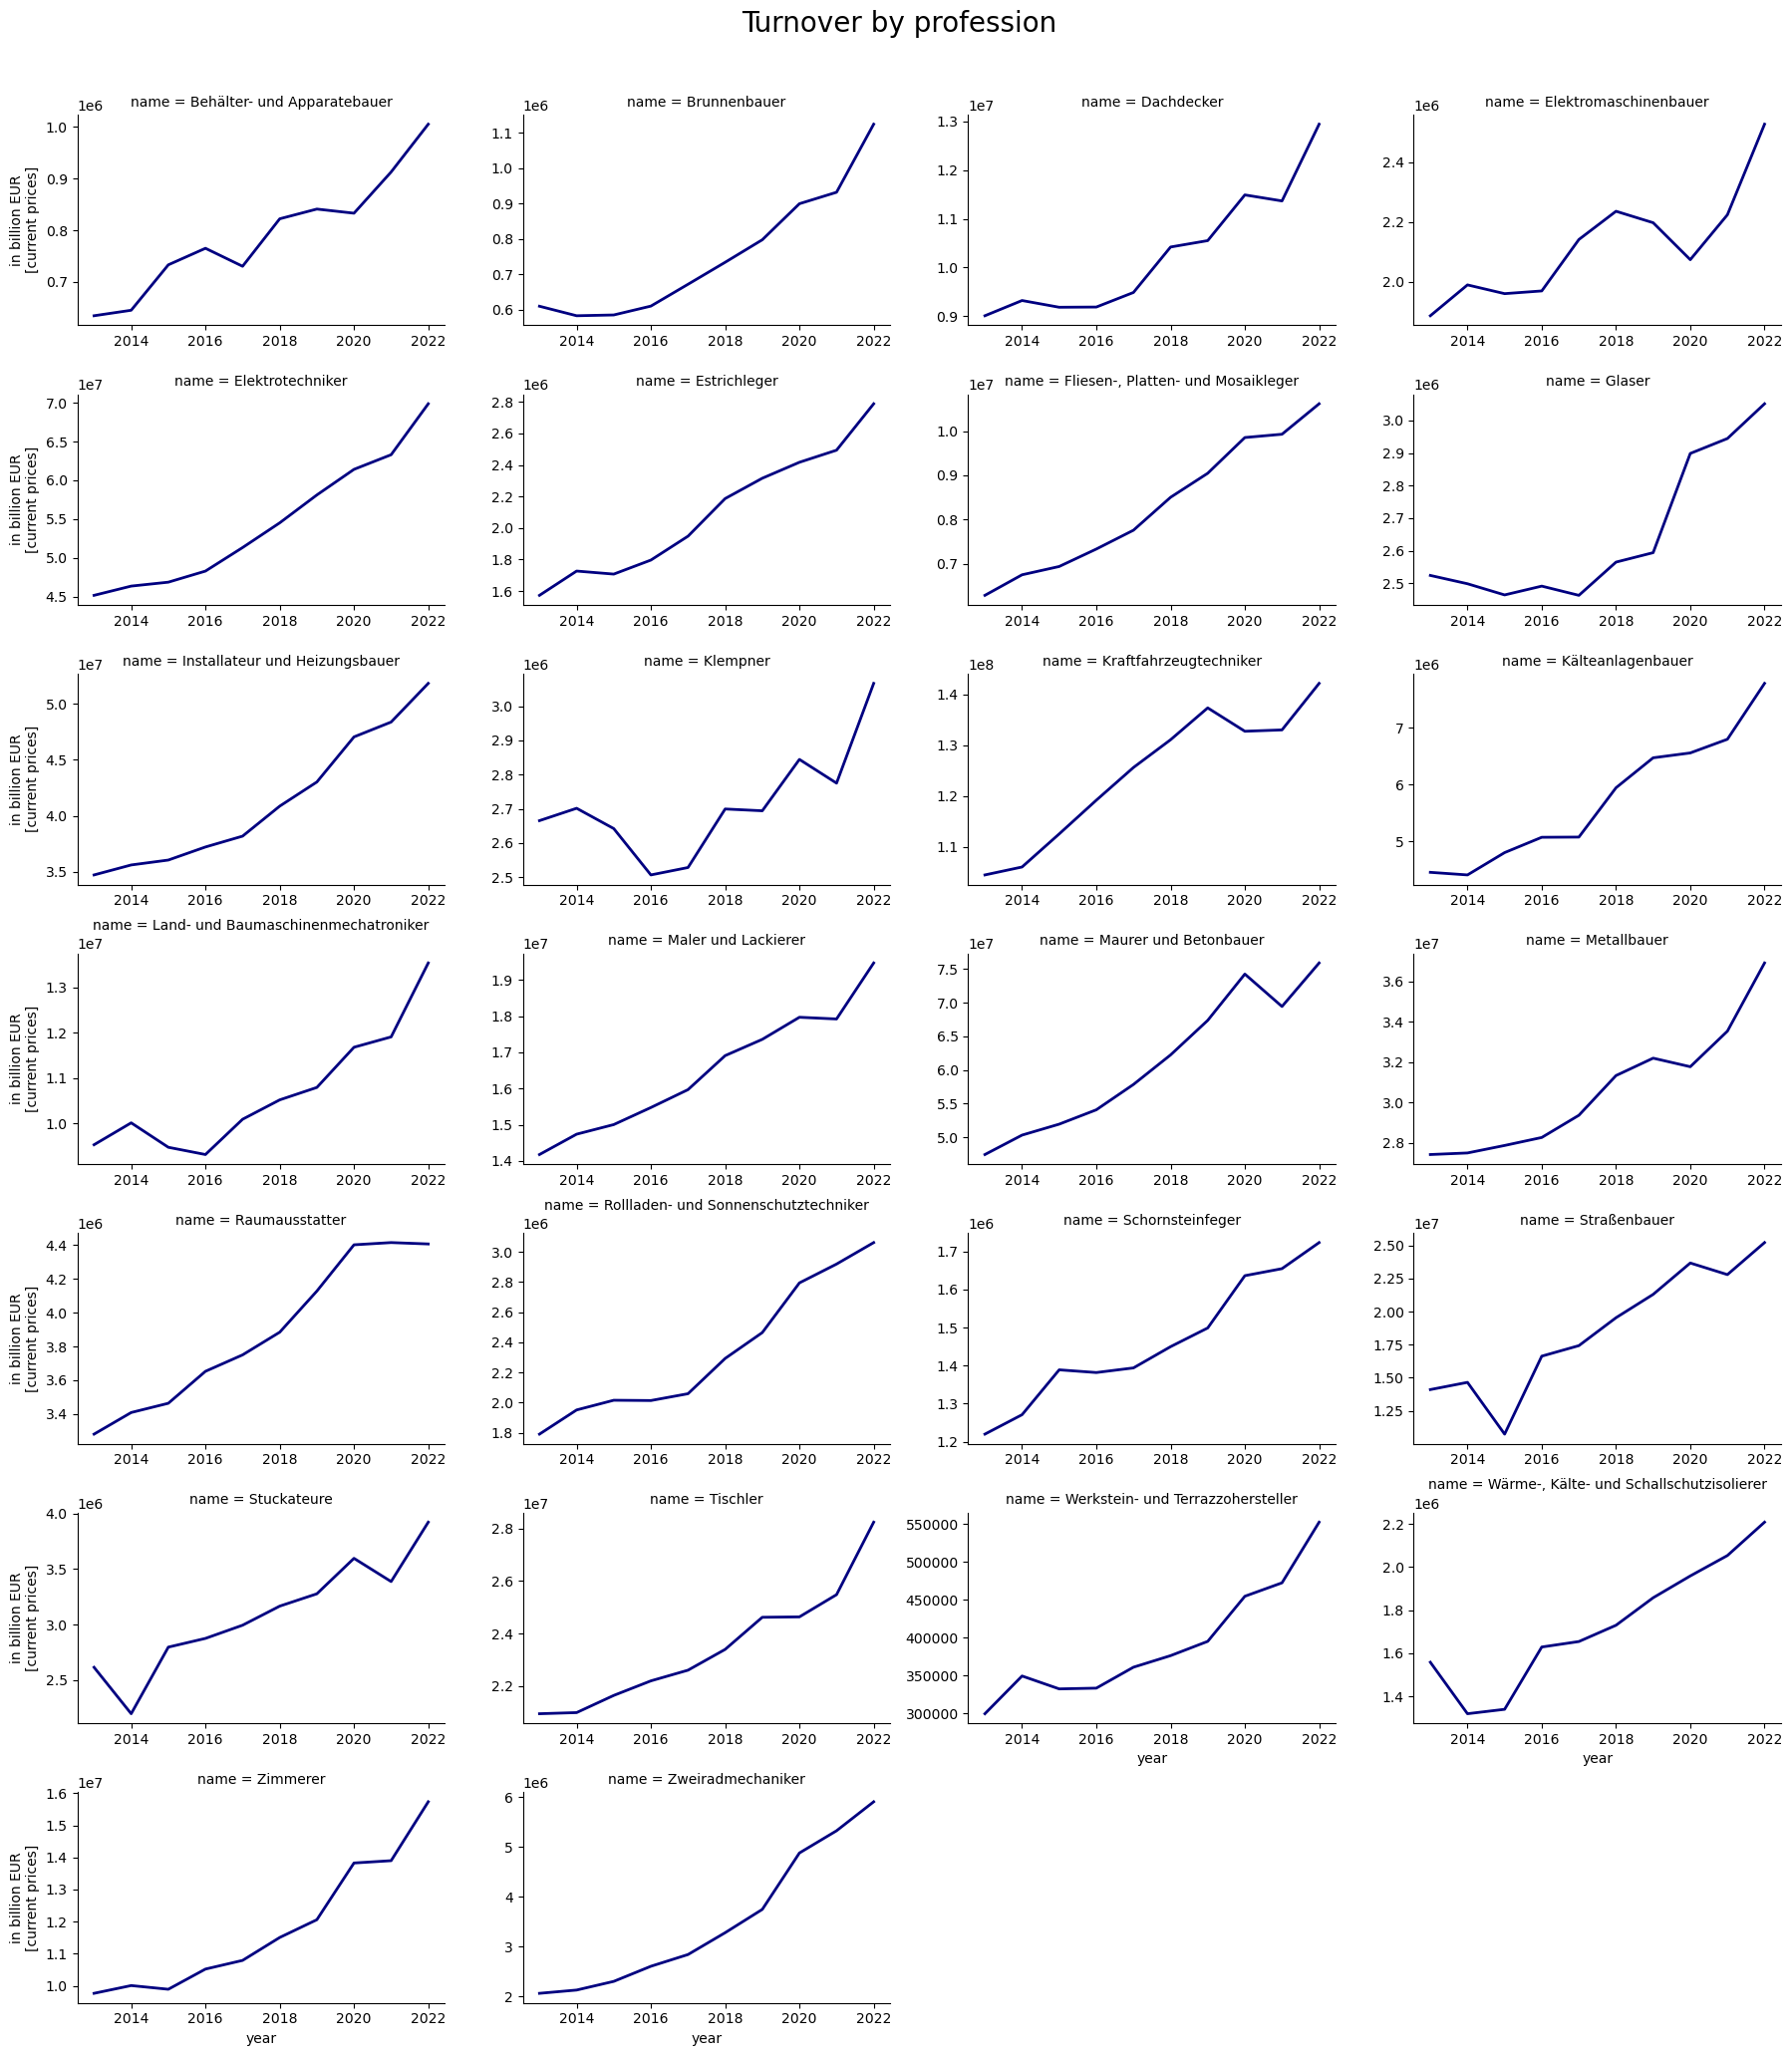

In [90]:
# Total turnover by year and profession
# -------------------------------------
figNY2 = sns.FacetGrid(groupedNY, col='name', sharex=False, sharey=False, col_wrap=4, height=3, aspect=1.5)
figNY2.map_dataframe(sns.lineplot, x='year', y='turnover',color="navy",linewidth=2)
for ax in figNY1.axes.flatten(): ax.ticklabel_format(style='plain', axis='y')
figNY2.set_axis_labels(y_var="in billion EUR\n[current prices]")
figNY2.fig.suptitle('Turnover by profession',fontsize=20)
figNY2.fig.subplots_adjust(top=.93) # adjust the space between title and figure
